# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [36]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from io import StringIO


In [37]:

url = "https://ycharts.com/companies/TSLA/revenues"


headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}


response = requests.get(url, headers=headers)


if response.status_code == 200:
    
    soup = BeautifulSoup(response.text, 'html.parser')
    
    
    tables = soup.find_all('table')
    
    print(f"Number of tables found: {len(tables)}")
    
    
    for i, table in enumerate(tables):
        print(f"\
Table {i + 1}:")
        print(table.prettify()[:500])  
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

print("\
Done")

Number of tables found: 4
Table 1:
<table class="table">
 <thead>
  <tr>
   <th>
    Date
   </th>
   <th class="text-right">
    Value
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    June 30, 2024
   </td>
   <td class="text-right">
    25.50B
   </td>
  </tr>
  <tr>
   <td>
    March 31, 2024
   </td>
   <td class="text-right">
    21.30B
   </td>
  </tr>
  <tr>
   <td>
    December 31, 2023
   </td>
   <td class="text-right">
    25.17B
   </td>
  </tr>
  <tr>
   <td>
    September 30, 2023
   </td>
   <td class="text-r
Table 2:
<table class="table">
 <thead>
  <tr>
   <th>
    Date
   </th>
   <th class="text-right">
    Value
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    March 31, 2018
   </td>
   <td class="text-right">
    3.409B
   </td>
  </tr>
  <tr>
   <td>
    December 31, 2017
   </td>
   <td class="text-right">
    3.288B
   </td>
  </tr>
  <tr>
   <td>
    September 30, 2017
   </td>
   <td class="text-right">
    2.985B
   </td>
  </tr>
  <tr>
   <td>
  

In [38]:

quarterly_table = tables[0]


rows = quarterly_table.find_all('tr')
data = []
for row in rows[1:]:  
    cols = row.find_all('td')
    if len(cols) >= 2:
        date = cols[0].text.strip()
        value = cols[1].text.strip()
        data.append([date, value])


df = pd.DataFrame(data, columns=['Date', 'Revenue'])


df['Date'] = pd.to_datetime(df['Date'])
df['Revenue'] = df['Revenue'].replace('[\$,B]', '', regex=True).astype(float) * 1e9  


df = df.sort_values('Date')


timestamp = time.strftime("%Y%m%d_%H%M%S")


filename = f"tesla_quarterly_revenues_{timestamp}.csv"
df.to_csv(filename, index=False)

print(f"Data successfully extracted, transformed, and saved to {filename}")
print("\
First few rows of the data:")
print(df.head())

print("\
Done")

Data successfully extracted, transformed, and saved to tesla_quarterly_revenues_20240829_121106.csv
First few rows of the data:
         Date       Revenue
24 2018-06-30  4.002000e+09
23 2018-09-30  6.824000e+09
22 2018-12-31  7.226000e+09
21 2019-03-31  4.541000e+09
20 2019-06-30  6.350000e+09
Done


<>:18: SyntaxWarning: invalid escape sequence '\$'
<>:18: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Felix\AppData\Local\Temp\ipykernel_19656\1164578176.py:18: SyntaxWarning: invalid escape sequence '\$'
  df['Revenue'] = df['Revenue'].replace('[\$,B]', '', regex=True).astype(float) * 1e9


In [39]:

df = pd.read_csv("tesla_quarterly_revenues_20240829_114743.csv")


df['Date'] = pd.to_datetime(df['Date'])


df['Revenue'] = df['Revenue'].replace('[\$,B]', '', regex=True).astype(float) * 1e9


df = df.dropna()
df = df[df['Revenue'] != 0]


df = df.sort_values('Date', ascending=False)


timestamp = time.strftime("%Y%m%d_%H%M%S")


cleaned_filename = f"tesla_quarterly_revenues_cleaned_{timestamp}.csv"
df.to_csv(cleaned_filename, index=False)

print(f"Data successfully cleaned and saved to {cleaned_filename}")
print("\
First few rows of the cleaned data:")
print(df.head())

print("\
Dataframe info:")
print(df.info())

print("\
Done")

Data successfully cleaned and saved to tesla_quarterly_revenues_cleaned_20240829_121106.csv
First few rows of the cleaned data:
         Date       Revenue
24 2024-06-30  2.550000e+19
23 2024-03-31  2.130000e+19
22 2023-12-31  2.517000e+19
21 2023-09-30  2.335000e+19
20 2023-06-30  2.493000e+19
Dataframe info:
<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 24 to 0
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     25 non-null     datetime64[ns]
 1   Revenue  25 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 600.0 bytes
None
Done


<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Felix\AppData\Local\Temp\ipykernel_19656\328669783.py:7: SyntaxWarning: invalid escape sequence '\$'
  df['Revenue'] = df['Revenue'].replace('[\$,B]', '', regex=True).astype(float) * 1e9


In [50]:
df = pd.read_csv("tesla_quarterly_revenues_20240829_114743.csv")
df.head()

,Date,Revenue
0,2018-06-30,4.002000e+09
1,2018-09-30,6.824000e+09
2,2018-12-31,7.226000e+09
3,2019-03-31,4.541000e+09
4,2019-06-30,6.350000e+09


In [44]:
connection = sqlite3.connect("Tesla.db")
connection

In [46]:
cursor = connection.cursor()
cursor.execute("""CREATE TABLE revenue (Date, Revenue)""")

OperationalError: table revenue already exists

In [47]:
tesla_tuples = list(df.to_records(index = False))
tesla_tuples[:5]

[('2018-06-30', 4.002e+09),
 ('2018-09-30', 6.824e+09),
 ('2018-12-31', 7.226e+09),
 ('2019-03-31', 4.541e+09),
 ('2019-06-30', 6.35e+09)]

In [51]:
cursor.executemany("INSERT INTO revenue VALUES (?,?)", tesla_tuples)
connection.commit()

In [52]:
for row in cursor.execute("SELECT * FROM revenue"):
    print(row)

('2018-06-30', 4002000000.0)
('2018-09-30', 6824000000.0)
('2018-12-31', 7226000000.0)
('2019-03-31', 4541000000.0)
('2019-06-30', 6350000000.0)
('2019-09-30', 6303000000.0)
('2019-12-31', 7384000000.0)
('2020-03-31', 5985000000.0)
('2020-06-30', 6036000000.0)
('2020-09-30', 8771000000.0)
('2020-12-31', 10740000000.0)
('2021-03-31', 10390000000.0)
('2021-06-30', 11960000000.0)
('2021-09-30', 13760000000.0)
('2021-12-31', 17720000000.0)
('2022-03-31', 18760000000.0)
('2022-06-30', 16930000000.0)
('2022-09-30', 21450000000.0)
('2022-12-31', 24320000000.0)
('2023-03-31', 23330000000.0)
('2023-06-30', 24930000000.0)
('2023-09-30', 23350000000.0)
('2023-12-31', 25170000000.0)
('2024-03-31', 21300000000.0)
('2024-06-30', 25500000000.0)
('2018-06-30', 4002000000.0)
('2018-09-30', 6824000000.0)
('2018-12-31', 7226000000.0)
('2019-03-31', 4541000000.0)
('2019-06-30', 6350000000.0)
('2019-09-30', 6303000000.0)
('2019-12-31', 7384000000.0)
('2020-03-31', 5985000000.0)
('2020-06-30', 6036000000.0)

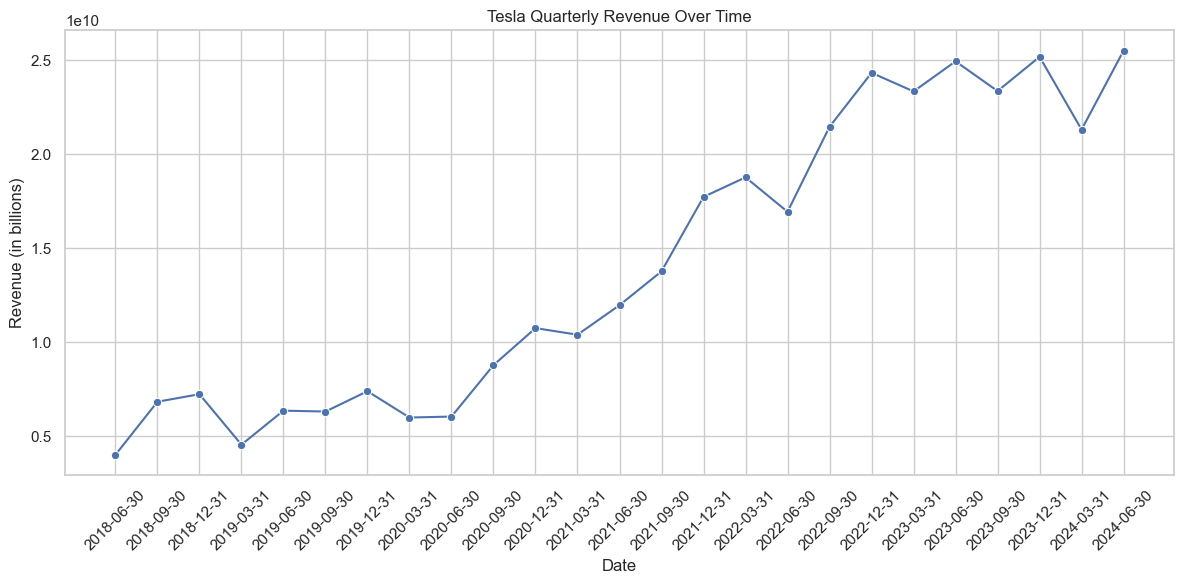

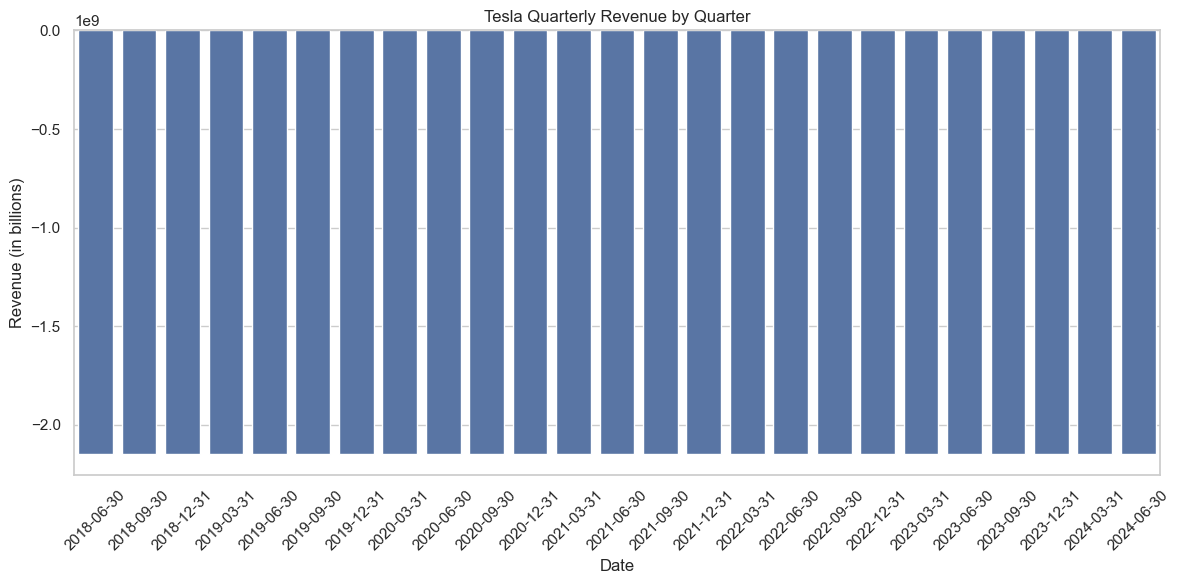

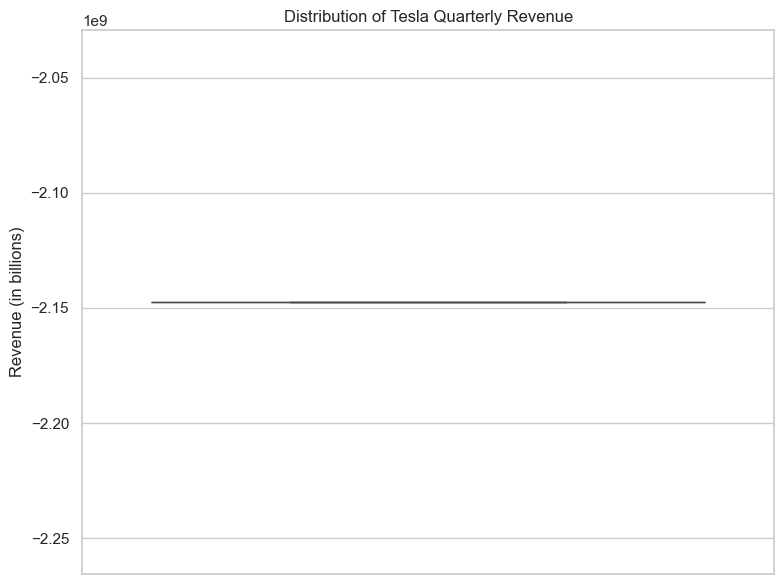

Visualizations created.


In [56]:
# Load the uploaded CSV file
df_uploaded = pd.read_csv('tesla_quarterly_revenues_20240829_114743.csv')

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values('Date')

# Set the style of seaborn
sns.set(style="whitegrid")

# 1. Line Plot: Revenue over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_uploaded, x='Date', y='Revenue', marker='o')
plt.title('Tesla Quarterly Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue (in billions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Bar Plot: Revenue by Quarter
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Date', y='Revenue')
plt.title('Tesla Quarterly Revenue by Quarter')
plt.xlabel('Date')
plt.ylabel('Revenue (in billions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Box Plot: Distribution of Revenue
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Revenue')
plt.title('Distribution of Tesla Quarterly Revenue')
plt.ylabel('Revenue (in billions)')
plt.tight_layout()
plt.show()

print("Visualizations created.")